In [23]:
# Importar bibliotecas necesarias
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt
import ht
#from ht.conv import overall_heat_transfer_coefficient
from CoolProp.CoolProp import PropsSI
from tikzplotlib import save as savetikz
# Datos del problema
mk = np.array(['s','o','<','d','p'])

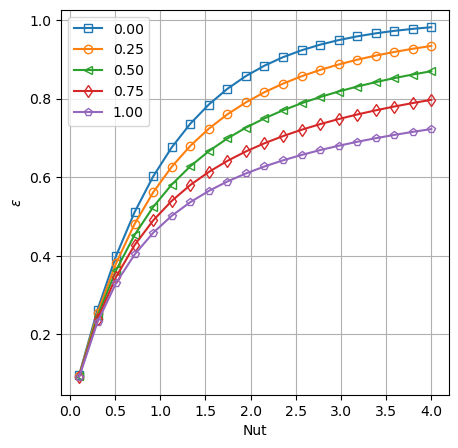

In [24]:
fig,ax = plt.subplots(figsize=(5,5))
Nut = np.linspace(0.1,4,20)
Crs = np.array([0.0001,0.25,0.50,0.75,1])
for j, Crj in enumerate(Crs):
    eps = np.zeros_like(Nut)
    for i, Nuti in enumerate(Nut):
        eps[i] = ht.effectiveness_from_NTU(Nuti,Crj,subtype='crossflow')
    ax.plot(Nut,eps,marker= mk[j],label = f'{Crj:.2f}',fillstyle='none')
ax.grid()
ax.set_xlabel('Nut')
ax.set_ylabel(r'$\varepsilon$')
ax.legend()
savetikz('intercambiador_eps_nut_crossflow.tikz')

Signature:
ht.effectiveness_from_NTU(
    NTU,
    Cr,
    subtype='counterflow',
    n_shell_tube=None,
)
Docstring:
Returns the effectiveness of a heat exchanger at a specified heat
capacity rate, number of transfer units, and configuration. The following
configurations are supported:

    * Counterflow (ex. double-pipe)
    * Parallel (ex. double pipe inefficient configuration)
    * Shell and tube exchangers with even numbers of tube passes,
      one or more shells in series
    * Crossflow, single pass, fluids unmixed
    * Crossflow, single pass, Cmax mixed, Cmin unmixed
    * Crossflow, single pass, Cmin mixed, Cmax unmixed
    * Boiler or condenser

These situations are normally not those which occur in real heat exchangers,
but are useful for academic purposes. More complicated expressions are
available for other methods. These equations are confirmed in [1]_,
[2]_, and [3]_.

For parallel flow heat exchangers:

.. math::
    \epsilon = \frac{1 - \exp[-NTU(1+C_r)]}{1+C_r}

Fo

In [8]:
Cmax = cp_agua*m_dot_agua
Cmin = cp_aire*m_dot_aire
Cr = Cmin/Cmax

display (Latex(f'$C_r={Cr:.2f}$'))

<IPython.core.display.Latex object>

In [9]:
Lt = 1

Ai = np.pi*d_int*Lt*n_tubos
Ui = h_total
display(Latex(f'$UA={Ui*Ai:.1f}$ w/K$'))

<IPython.core.display.Latex object>

In [10]:
Nut = Ui*Ai/Cmin

In [11]:
ht.effectiveness_from_NTU(Nut,Cr)

0.22597332190738867

In [12]:
Nut

0.2704771978983894